<a href="https://colab.research.google.com/github/mokoron/EDA/blob/master/eda_omega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/2520/1*3rMzzcOz933RVvaO17UVLg.jpeg">

# Some useful uploadings and imports

In [ ]:
%%capture
!wget  -O "Roboto.zip" "https://fonts.google.com/download?family=Roboto"

In [ ]:
%%capture
!unzip "Roboto.zip"

In [ ]:
%%capture
!mv Roboto-Light.ttf  /usr/share/fonts/truetype/

In [ ]:
import pandas as pd
from plotstables import inform, print_dialog, ling, ngrams, clusterize

# EDA for Omega chat logs dataset

let's start with some general information about the dataframe

### Here are 10 first lines of the dataset

In [ ]:
data = pd.read_csv('en-US.csv', sep='\t', names=['dialog_index', 'speaker_index', 'support', 'datettime', 'message'])
data.head(10)

,dialog_index,speaker_index,support,datettime,message
0,447842000754010922,3402939147751915780,1,2017-04-11T22:40:30.057Z,"Hello, my name is Rick, how may I help you?"
1,447842000754010922,447842000045207126,0,2017-04-11T22:41:31.473Z,Hi there
2,447842000754010922,447842000045207126,0,2017-04-11T22:41:37.903Z,My name is Angel
3,447842000754010922,447842000045207126,0,2017-04-11T22:42:16.410Z,I need a kit of heater and a hygrostat control
4,447842000754010922,447842000045207126,0,2017-04-11T22:42:23.860Z,for a cabinet enclosure
5,447842000754010922,447842000045207126,0,2017-04-11T22:42:32.183Z,200W at 220/127 VCA
6,447842000754010922,447842000045207126,0,2017-04-11T22:42:48.267Z,I liked MFR012
7,447842000754010922,447842000045207126,0,2017-04-11T22:42:59.840Z,but I do not know what heater I could use
8,447842000754010922,3402939147751915780,1,2017-04-11T22:43:09.513Z,Please hold while I investigate. Thank You.
9,447842000754010922,447842000045207126,0,2017-04-11T22:43:27.847Z,my cabinet is for electric protection and cont...


### Some information about the columns values and types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218158 entries, 0 to 218157
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   dialog_index   218158 non-null  int64 
 1   speaker_index  218158 non-null  int64 
 2   support        218158 non-null  int64 
 3   datettime      218158 non-null  object
 4   message        218152 non-null  object
dtypes: int64(3), object(2)
memory usage: 8.3+ MB


### Number of null values in the dataset

In [ ]:
data.isnull().sum()

dialog_index     0
speaker_index    0
support          0
datettime        0
message          6
dtype: int64

### Information about the total number of messages, dialogsm speakers etc.

,info,value
0,Total number of messages (i.e. lines in the da...,218158.0
1,Total number of dialogs,17345.0
2,Total number of speakers (including support),14128.0
3,Total number of support messages,108455.0
4,Total number of customer messages,109703.0
5,Mean number of messages per dialog,13.0
6,Max number of messages per dialog,116.0
7,Min number of messages per dialog,1.0


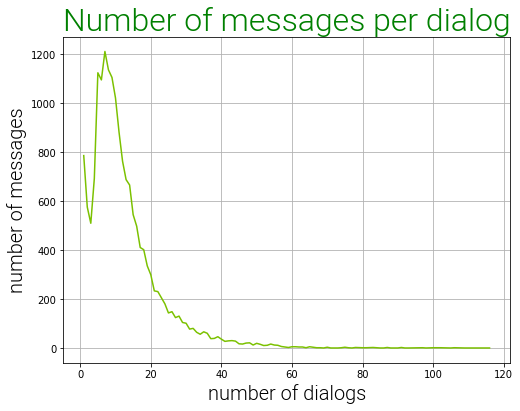

In [ ]:
info, plt, ex_mn, ex_men, ex_mx = inform(data)
info

## Here is an illustration of 3 dialogs of different length from the dataset:

### Example of a dialog of the mean length

In [ ]:
print_dialog(ex_men)

support: Hello, my name is Richard, how may I help you?
customer: I'm looking for a thermometer. I have a Omega 866C and looking for a similar.
customer: The cable we use is a Jack to a female mini jack where we plug in a RTD cable
support: Please hold while I investigate. Thank You.
customer: I have found your 868 and 869 series but the mating connection isn't the same as the 866C. But if there is a cable who can be attached these and have a female mini-jack in the end then it would be an solution.
support: http://www.omega.com/temperature/pdf/ON-403-PP.pdf
support: http://www.omega.co.uk/pptst/ON-403-PP.html
customer: Thank you. We have out own 'one time use' Sensor. Do you have a link to the device who supports that jack plug?
support: http://www.omega.co.uk/pptst/ON-400_PROBES.html
customer: Thank you!If I have a device (866C) which needs to be calibrated is it then something you do? And how much does such service cost?
support: How many calibration points are required?
customer: h

### Example of a dialog of the min length

In [ ]:
print_dialog(ex_mn)

support: Hello, my name is Bob Schaale, how may I help you? 


### Example of a dialog of the max length:

In [ ]:
print_dialog(ex_mx)

support: Hello, my name is Steve, how may I help you?
customer: Hi Steve.
customer: I've a project that involves using a lot of long thermocouples
customer: Long = about 70 to 80 ft thermocouples.
customer: When I tried comparing the accuracy of longer thermocouple with smaller length, there is always a difference in reading between two thermocouples
customer: although the tips are at same place
support: hello Sachin , what is the application ? max and min temp ?
customer: It is embedded in concrete pavement -- so it would be few degrees different than normal outside temperature
customer: -15 to 50 degree celsius
support: we can offer a T type ready made thermocouple that is 80 ft long , 
customer: We have Type N
customer: So my question is, i there a way to account for these drifts?
customer: Actually if you have an email id, it would be easier to show you the graphs.
support: are you welding&nbsp; the N type wire &nbsp; ?&nbsp; how much of a difference are you getting? is this an Ome

# Let's now look at some linguistic features of the messages

We will analyse syntactic, morphological and character features of N examples of our data (N value is the second argument of `ling` function)

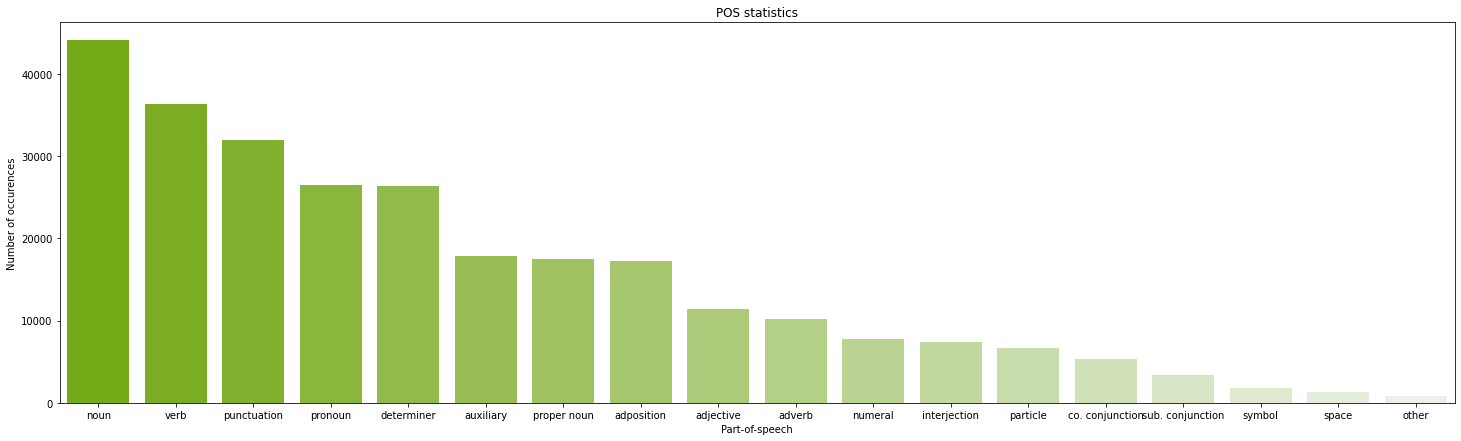

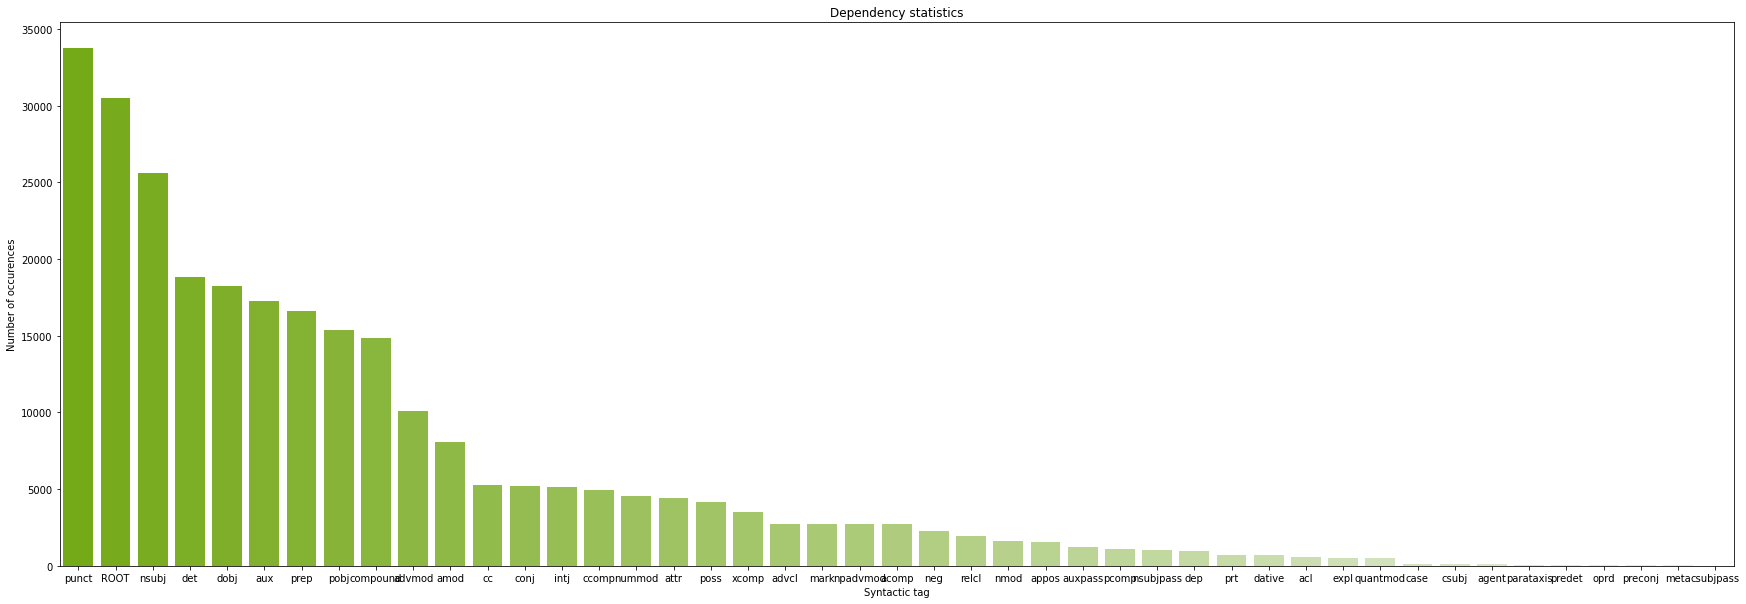

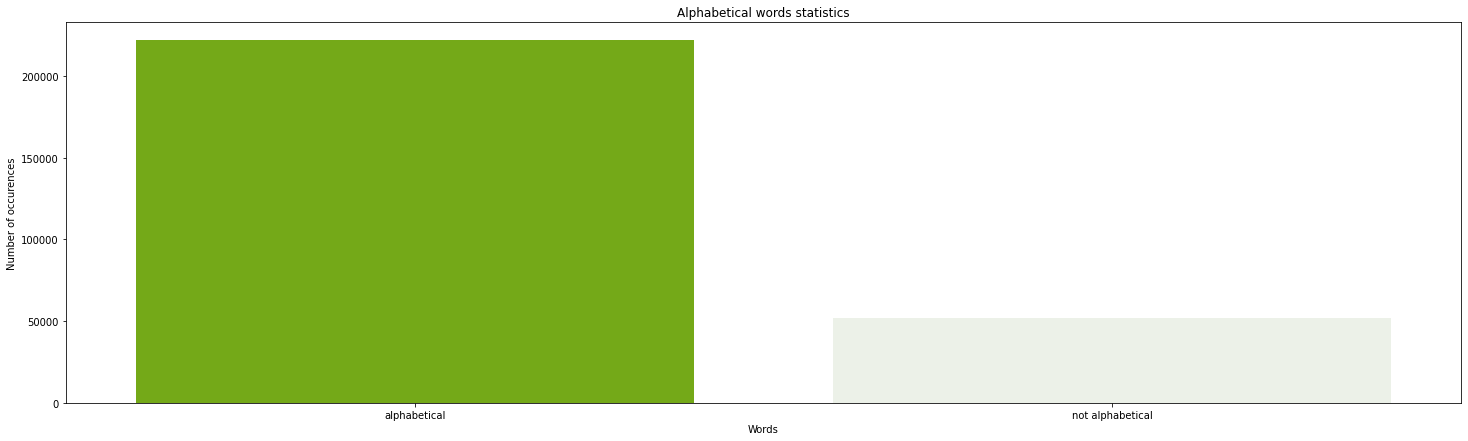

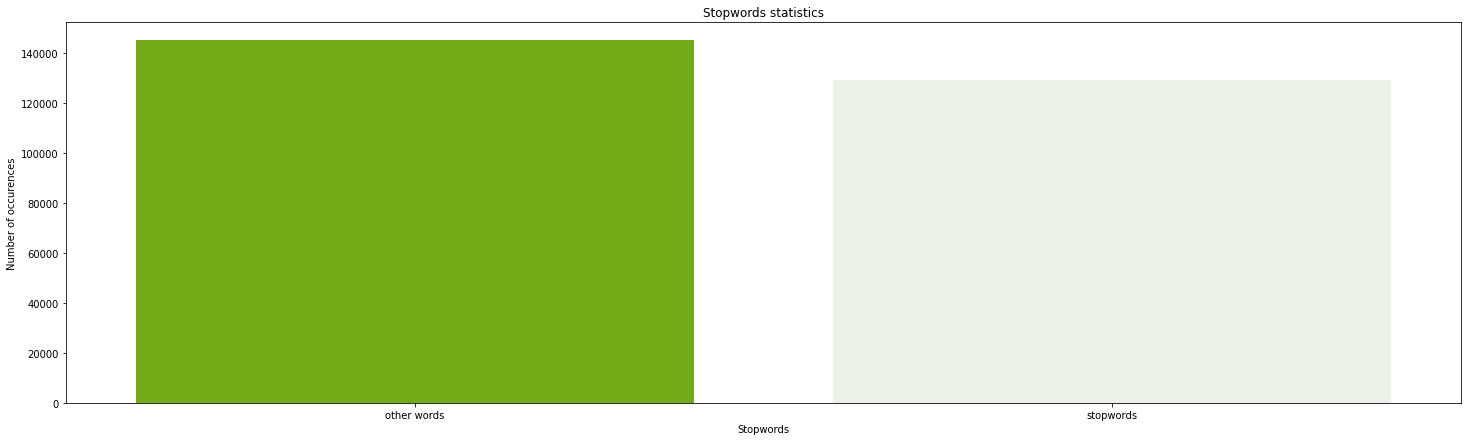

In [ ]:
ling(data, 2000)

# Ngram frequency in our dataset

the second argument of `ngrams` function is number of examples to analyse, the third one is a tuple of ngrams to count, the forth one is frequency until which values are printed (Note that third argument enlarges number of variables that should be written before the fucntion call)

In [ ]:
first, second, third = ngrams(data, 2000, (1,2,3), 50, stopwords=True)

### Most frequent unigrams (words)

In [ ]:
for num, word in first:
  print(num, word)

210 help
191 omega
184 hello
177 need
146 thanks
126 com
123 www
117 ok
115 http
110 thank
104 hi
96 pressure
87 nbsp
87 great
86 pdf
84 temperature
83 assistance
80 contact
74 day
73 looking
67 yes
67 order
56 want
56 pptst
55 flow
54 html
53 like
51 send
50 use
50 contacting


### Most frequent bigrams

In [ ]:
for num, word in second:
  print(num, word)

115 http www
110 www omega
109 omega com
57 need assistance
56 great day


### Most frequent trigrams

In [ ]:
for num, word in third:
  print(num, word)

109 http www omega
93 www omega com


### Cluster analysis for 1% of our dataset

A dendrogram

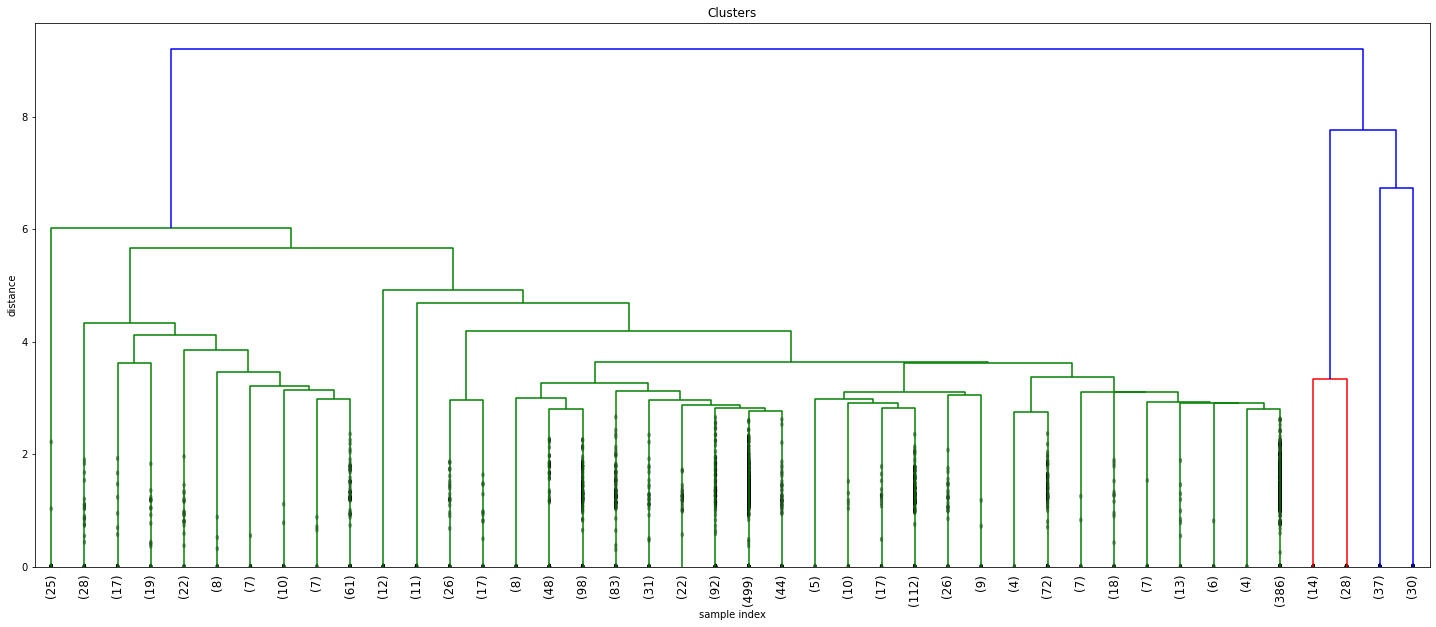

In [ ]:
one, two, three, four = clusterize(data, 2000, 4)

examples of 4 clusters

In [ ]:
one

,message,cluster
0,Hi there,1
50,Hi there,1
55,hi there,1
69,"Hi Richard, still there?",1
73,hi,1


In [ ]:
two

,message,cluster
60,Can you help? Thanks,2
72,thanks for your help,2
145,And thanks for your time,2
164,will use the website and thanks for your help,2
208,Perfect. Thanks for your help,2


In [ ]:
three

,message,cluster
25,That will work great then,3
26,Great,3
54,thats great news thank you for the support,3
94,okay thats great,3
276,Great! I will purchase this afternoon.,3


In [ ]:
four

,message,cluster
154,Have a nice day,4
231,"Thank you, have a good day",4
291,OK. Thank you Andy. Have a nice day.,4
308,ok thank you have a great day,4
318,thanks so much. have a great day.,4
